<a href="https://colab.research.google.com/github/hn-iiitd/ML_Project/blob/idhant/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

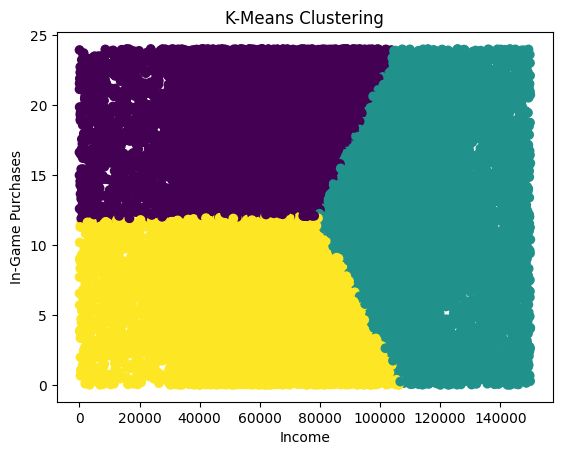

In [25]:
import pandas as pd

data = pd.read_csv('/content/online_gaming_behavior_dataset_updated.csv')

data.head()

X = data[['EstimatedAnnualIncome', 'PlayTimeHours']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

clusters = kmeans.labels_

plt.scatter(X['EstimatedAnnualIncome'], X['PlayTimeHours'], c=kmeans.labels_)
plt.xlabel('Income')
plt.ylabel('In-Game Purchases')
plt.title('K-Means Clustering')
plt.show()

Sampled Dataset Size: 24998


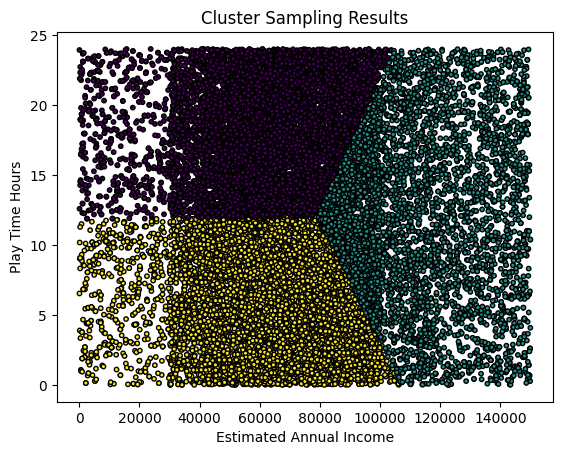

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome,Cluster
0,27902,30,Male,USA,RPG,4.234774,0,Easy,15,76,99,24,Medium,60121,2
1,11227,38,Male,USA,Sports,3.261882,1,Medium,13,38,32,27,Medium,85402,2
2,22856,45,Female,USA,RPG,1.076459,0,Easy,7,57,16,21,Medium,84557,2
3,44003,46,Male,Asia,Strategy,9.441735,0,Easy,4,107,22,17,Medium,66093,2
4,22362,17,Male,Europe,Action,5.487086,0,Hard,7,24,83,7,Low,49734,2


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load data
data = pd.read_csv('/content/online_gaming_behavior_dataset_updated.csv')

# Step 2: Select relevant features
X = data[['EstimatedAnnualIncome', 'PlayTimeHours']]

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Assign clusters to data points
data['Cluster'] = kmeans.labels_

# Step 5: Calculate the number of samples to draw from each cluster
# Proportional sampling based on cluster sizes
total_samples = 25000
cluster_sizes = data['Cluster'].value_counts()
cluster_proportions = cluster_sizes / cluster_sizes.sum()
samples_per_cluster = (cluster_proportions * total_samples).astype(int)

# Step 6: Perform cluster sampling
# Initialize a DataFrame for sampled data
sampled_data = pd.DataFrame()

for cluster, n_samples in samples_per_cluster.items():
    cluster_data = data[data['Cluster'] == cluster]
    sampled_cluster_data = cluster_data.sample(n=n_samples, random_state=42, replace=True)  # Replace if necessary
    sampled_data = pd.concat([sampled_data, sampled_cluster_data])

# Ensure the total size is exactly 25,000
if len(sampled_data) > total_samples:
    sampled_data = sampled_data.sample(n=total_samples, random_state=42)

# Step 7: Save and verify the sampled dataset
print("Sampled Dataset Size:", len(sampled_data))
sampled_data.to_csv('/content/sampled_dataset_25000.csv', index=False)

# Step 8: Visualize sampled data
plt.scatter(sampled_data['EstimatedAnnualIncome'], sampled_data['PlayTimeHours'], c=sampled_data['Cluster'], cmap='viridis', edgecolor='k', s=10)
plt.xlabel('Estimated Annual Income')
plt.ylabel('Play Time Hours')
plt.title('Cluster Sampling Results')
plt.show()

test = pd.read_csv('/content/sampled_dataset_25000.csv')
test.head()



Cluster 3 Statistics:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  15554.000000  15554.000000   15554.000000     15554.000000   
mean   28961.760319     32.093609      11.959313         0.199949   
std    11522.880588     10.012535       6.895924         0.399974   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19136.250000     23.000000       5.992237         0.000000   
50%    28993.000000     32.000000      12.003459         0.000000   
75%    38872.500000     41.000000      17.891514         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     15554.000000               15554.000000  15554.000000   
mean          9.544362                  89.669924     50.825961   
std           4.750577                  43.650229     28.587318   
min           0.000000                  10.000000      1.000000   
25%           6.00000

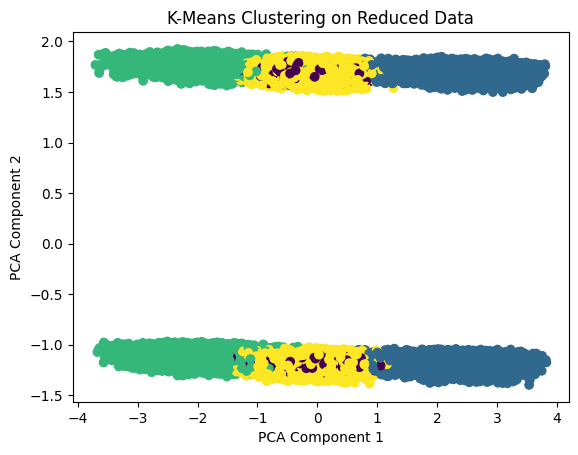

KeyError: "['target'] not found in axis"

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ... (K-Means clustering and other preprocessing steps)

# Descriptive statistics for each cluster
for cluster_num in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster_num]
    print(f"Cluster {cluster_num} Statistics:")
    print(cluster_data.describe())

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Reduced Data')
plt.show()

# Feature importance analysis (Example using Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a target variable 'target'
X = data.drop('target', axis=1)
y = data['target']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

plt.title('Feature Importances')
plt.show()


(24998, 19)


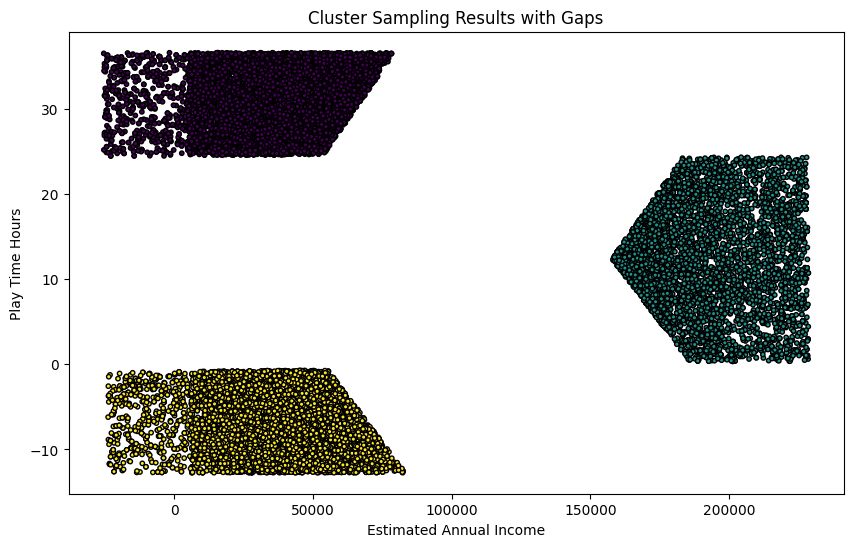

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load data
data = pd.read_csv('/content/online_gaming_behavior_dataset_updated.csv')

# Step 2: Select relevant features
X = data[['EstimatedAnnualIncome', 'PlayTimeHours']]

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Assign clusters to data points
data['Cluster'] = kmeans.labels_
data['ScaledIncome'] = X_scaled[:, 0]
data['ScaledPlayTime'] = X_scaled[:, 1]

# Step 5: Introduce a gap between clusters
# Retrieve cluster centroids
centroids = kmeans.cluster_centers_

# Apply a scaling factor to separate clusters
separation_factor = 2.0
for i in range(len(centroids)):
    # Shift all points in the cluster by a scaled vector from the origin
    cluster_mask = data['Cluster'] == i
    data.loc[cluster_mask, 'ScaledIncome'] += centroids[i][0] * separation_factor
    data.loc[cluster_mask, 'ScaledPlayTime'] += centroids[i][1] * separation_factor

# Reverse scale to bring back to the original feature space
data['AdjustedIncome'] = scaler.inverse_transform(data[['ScaledIncome', 'ScaledPlayTime']])[:, 0]
data['AdjustedPlayTime'] = scaler.inverse_transform(data[['ScaledIncome', 'ScaledPlayTime']])[:, 1]

# Step 6: Perform cluster sampling
total_samples = 25000
cluster_sizes = data['Cluster'].value_counts()
cluster_proportions = cluster_sizes / cluster_sizes.sum()
samples_per_cluster = (cluster_proportions * total_samples).astype(int)

sampled_data = pd.DataFrame()
for cluster, n_samples in samples_per_cluster.items():
    cluster_data = data[data['Cluster'] == cluster]
    sampled_cluster_data = cluster_data.sample(n=n_samples, random_state=42, replace=True)
    sampled_data = pd.concat([sampled_data, sampled_cluster_data])

# Ensure the total size is exactly 25,000
if len(sampled_data) > total_samples:
    sampled_data = sampled_data.sample(n=total_samples, random_state=42)

# Step 7: Save and visualize
sampled_data.to_csv('/content/sampled_dataset_25000_with_gap.csv', index=False)

test2 = pd.read_csv('/content/sampled_dataset_25000_with_gap.csv')
test2.head()
print(test2.shape)

plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['AdjustedIncome'], sampled_data['AdjustedPlayTime'], c=sampled_data['Cluster'], cmap='viridis', edgecolor='k', s=10)
plt.xlabel('Estimated Annual Income')
plt.ylabel('Play Time Hours')
plt.title('Cluster Sampling Results with Gaps')
plt.show()
